Analytics Hackathon-2021

In [ ]:
!unzip '/content/drive/MyDrive/machineHack/Analytics Olympiad-2021(shiv Nadar)/Shiv_Nadar_DAC.zip'

Archive:  /content/drive/MyDrive/machineHack/Analytics Olympiad-2021(shiv Nadar)/Shiv_Nadar_DAC.zip
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv('/content/train.csv')
df.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [ ]:
test=pd.read_csv('/content/test.csv')
test.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3


In [ ]:
df.shape

(87864, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87864 entries, 0 to 87863
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_ID               87864 non-null  object 
 1   Item_W                87864 non-null  float64
 2   Item_Type             87864 non-null  object 
 3   Item_MRP              87864 non-null  float64
 4   Outlet_ID             87864 non-null  object 
 5   Outlet_Year           87864 non-null  int64  
 6   Outlet_Size           87864 non-null  object 
 7   Outlet_Location_Type  87864 non-null  object 
 8   Sales                 87864 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.0+ MB


In [ ]:
df.describe()

,Item_W,Item_MRP,Outlet_Year,Sales
count,87864.000000,87864.000000,87864.00000,87864.000000
mean,15.591469,151.242943,1999.87063,1911.842120
std,4.364429,59.536366,6.63429,1291.386004
min,7.992700,32.910015,1987.00000,-1229.360345
25%,10.968658,112.423337,1997.00000,959.249675
50%,15.831170,145.581473,1999.00000,1606.307877
75%,19.969936,197.110367,2004.00000,2608.057736
max,21.250000,265.214271,2009.00000,10309.283310


In [ ]:
df.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [ ]:
test.shape

(37656, 8)

In [ ]:
test.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
dtype: int64

In [ ]:
# df.drop(columns=['Item_ID'],axis = 1,inplace = True)

In [ ]:
df.groupby('Item_Type')['Item_MRP','Item_W'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Item_MRP,Item_W
Item_Type,,
Baking Goods,150.702459,15.053796
Breads,147.199312,15.270986
Breakfast,156.858735,16.637266
Canned,153.352637,16.179592
Dairy,155.376347,16.564873
Frozen Foods,154.739848,16.436911
Fruits and Vegetables,147.637898,15.340384
Hard Drinks,151.503811,14.901788
Health and Hygiene,154.309473,16.252626


In [ ]:
df['Item_ID'].value_counts(normalize=True)*100

FDE11    0.476873
NCE07    0.412000
NCL18    0.393790
NCO06    0.382409
FDD51    0.374442
           ...   
DRF60    0.002276
FDB20    0.002276
FDM15    0.002276
FDA22    0.001138
NCM19    0.001138
Name: Item_ID, Length: 895, dtype: float64

In [ ]:
df['Item_category']=df['Item_ID'].str[:2]

In [ ]:
test['Item_category']=test['Item_ID'].str[:2]

In [ ]:
df['new_item']=df['Item_ID'].str[-2:].astype('int')

In [ ]:
test['new_item']=df['Item_ID'].str[-2:].astype('int')

In [ ]:
df[:5]

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,Item_category,new_item
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,FD,32
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,NC,54
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,FD,8
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,FD,22
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,FD,47


In [ ]:
test[:5]

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Item_category,new_item
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3,DR,32
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3,FD,54
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1,FD,8
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2,FD,22
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3,FD,47


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


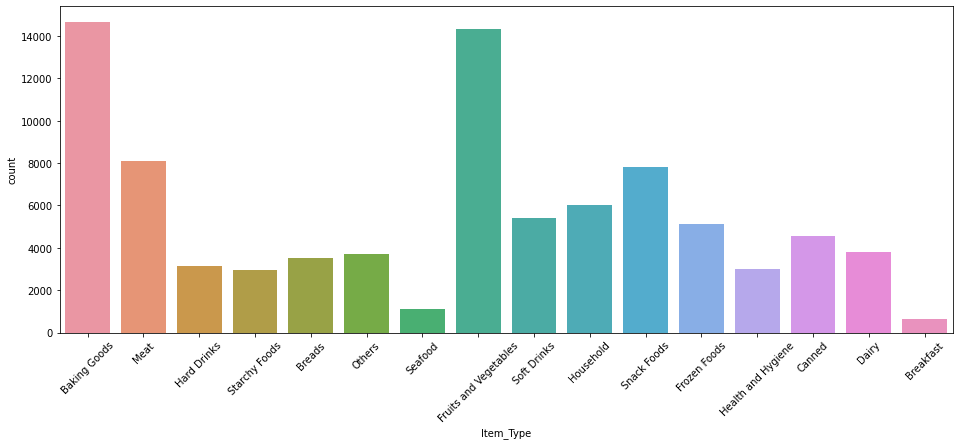

In [ ]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=45)
sns.countplot(df['Item_Type'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


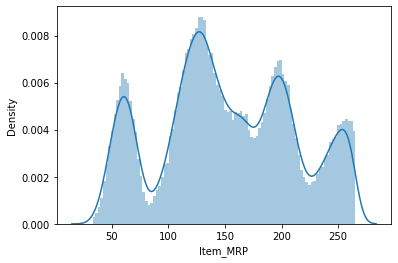

In [ ]:
sns.distplot(df['Item_MRP'],bins=100)

In [ ]:
def convert_into_one_hot_encoded_form(s):
    if s<=67.5:
        return 0
    elif (s>67.5) & (s<=134.5):
        return 1
    elif (s>134.5) & (s<=201.1):
        return 2
    else:
        return 3

In [ ]:
df['MRP_bins']=df['Item_MRP'].apply(convert_into_one_hot_encoded_form)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


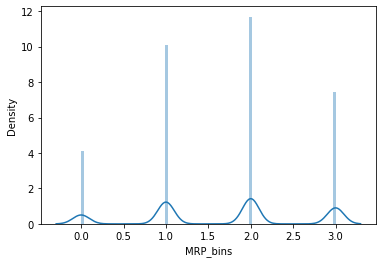

In [ ]:
sns.distplot(df['MRP_bins'],bins=100)

In [ ]:
test['MRP_bins']=test['Item_MRP'].apply(convert_into_one_hot_encoded_form)

In [ ]:
df['Outlet_ID'].value_counts()

OUT035    24071
OUT046    20850
OUT018    17156
OUT049    13356
OUT013    12431
Name: Outlet_ID, dtype: int64

In [ ]:
df['new_outlet']=df['Outlet_ID'].str.split('0').str.get(1).astype('int')

In [ ]:
test['new_outlet']=test['Outlet_ID'].str.split('0').str.get(1).astype('int')

In [ ]:
df[:5]

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,Item_category,new_item,MRP_bins,new_outlet
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,FD,32,2,46
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,NC,54,2,35
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,FD,8,3,35
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,FD,22,3,46
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,FD,47,3,35


In [ ]:
test[:5]

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Item_category,new_item,MRP_bins,new_outlet
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3,DR,32,1,13
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3,FD,54,3,18
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1,FD,8,3,18
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2,FD,22,2,46
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3,FD,47,2,18


In [ ]:

df['Outlet_Year'].value_counts()

1997    16916
2004    15197
2009    13662
1999    13046
1987    10357
1996     4684
2003     4622
2008     4106
1998     3798
1988     1440
2007       20
2005       16
Name: Outlet_Year, dtype: int64

In [ ]:
df['since']=2013-df['Outlet_Year']

In [ ]:
test['since']=2013-test['Outlet_Year']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


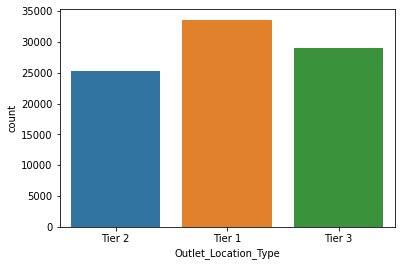

In [ ]:
sns.countplot(df['Outlet_Location_Type'])

detecting the outliers

In [ ]:
df.boxplot(column = 'Sales')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


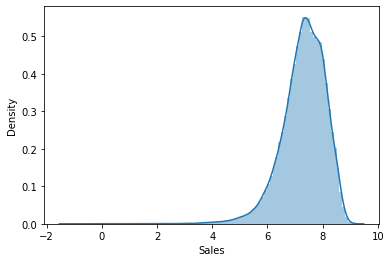

In [ ]:
sns.distplot(np.log1p(df['Sales']),bins=100)

to overcome the outlier in the target variable

In [ ]:
q1 = df.quantile(q = 0.25)
q3 = df.quantile(q = 0.75)
iqr = q3 - q1
print('IQR for train :',iqr)

IQR for train : Item_W            9.001278
Item_MRP         84.687030
Outlet_Year       7.000000
Sales          1648.808061
new_item         30.000000
MRP_bins          1.000000
new_outlet       28.000000
since             7.000000
dtype: float64


In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [ ]:
lowprice,uppprice = remove_outlier(df['Sales'])


In [ ]:
uppprice 

5081.2698282

In [ ]:
df['Sales']=np.where(df['Sales']>uppprice,uppprice,df['Sales'])
df['Sales']=np.where(df['Sales']<lowprice,lowprice,df['Sales'])

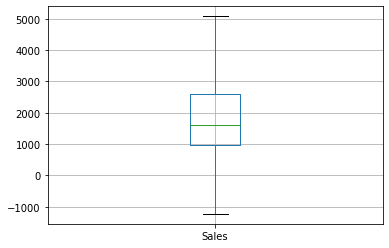

In [ ]:
df.boxplot(column = 'Sales')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


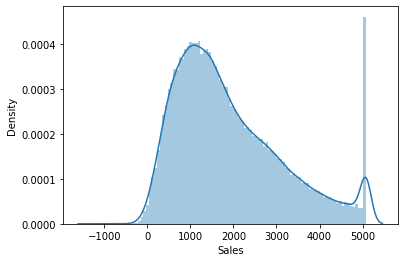

In [ ]:
sns.distplot(df['Sales'],bins=100)

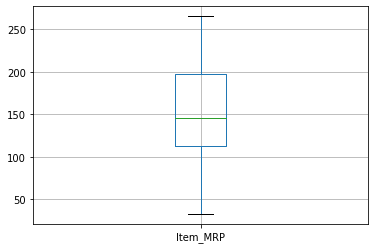

In [ ]:
df.boxplot(column = 'Item_MRP')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


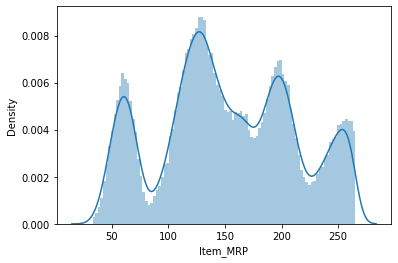

In [ ]:
sns.distplot(df['Item_MRP'],bins=100)

In [ ]:
df.corr()

,Item_W,Item_MRP,Outlet_Year,Sales,new_item,MRP_bins,new_outlet,since
Item_W,1.000000,-0.022830,0.009632,0.000800,0.002828,-0.018305,-0.032792,-0.009632
Item_MRP,-0.022830,1.000000,-0.009837,0.014094,-0.002244,0.946715,0.023433,0.009837
Outlet_Year,0.009632,-0.009837,1.000000,-0.037117,0.002296,-0.009558,-0.139305,-1.000000
Sales,0.000800,0.014094,-0.037117,1.000000,0.000134,0.013225,0.026789,0.037117
new_item,0.002828,-0.002244,0.002296,0.000134,1.000000,-0.001213,0.000033,-0.002296
MRP_bins,-0.018305,0.946715,-0.009558,0.013225,-0.001213,1.000000,0.015865,0.009558
new_outlet,-0.032792,0.023433,-0.139305,0.026789,0.000033,0.015865,1.000000,0.139305
since,-0.009632,0.009837,-1.000000,0.037117,-0.002296,0.009558,0.139305,1.000000


In [ ]:
df[:5]

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales,Item_category,new_item,MRP_bins,new_outlet,since
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781,FD,32,2,46,9
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375,NC,54,2,35,26
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268,FD,8,3,35,14
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376,FD,22,3,46,17
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829,FD,47,3,35,25


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# ll=LabelEncoder()

In [ ]:
# for col in df.columns[df.dtypes=='object'].drop('Item_ID','Outlet_ID'):
#     df[col]=ll.fit_transform(df[col])

In [ ]:
# for col in test.columns[test.dtypes=='object'].drop('Item_ID','Outlet_ID'):
#     test[col]=ll.fit_transform(test[col])

In [ ]:
df.drop(['Item_Type','Outlet_ID','Item_ID'],axis=1,inplace = True)

In [ ]:
test.drop(['Item_Type','Outlet_ID','Item_ID'],axis=1,inplace = True)

In [ ]:
df = pd.get_dummies(df)
test = pd.get_dummies(test)

In [ ]:
df['new_outlet'].unique()

array([46, 35, 49, 18, 13])

In [ ]:
df.groupby(['new_outlet'])['Sales'].mean().sort_values()

new_outlet
18    1646.930873
46    1879.236788
49    1937.558609
35    1979.001816
13    2031.413877
Name: Sales, dtype: float64

In [ ]:
def convert_outlet_no_into_concise_no(s):
    if s in [1,19]:
        return 1
    else:
        return s

In [ ]:
df['new_outlet1']=df['new_outlet'].apply(convert_outlet_no_into_concise_no)

In [ ]:
df[:5]

,Item_W,Item_MRP,Outlet_Year,Sales,new_item,MRP_bins,new_outlet,since,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_category_DR,Item_category_FD,Item_category_NC,new_outlet1
0,21.027499,197.352319,2004,2689.457781,32,2,46,9,0,0,1,0,1,0,0,1,0,46
1,21.102371,148.250214,1987,3437.350375,54,2,35,26,0,0,1,1,0,0,0,0,1,35
2,20.882263,205.465010,1999,3129.967268,8,3,35,14,0,0,1,0,0,1,0,1,0,35
3,21.050435,253.417583,1996,1306.514376,22,3,46,17,0,0,1,1,0,0,0,1,0,46
4,21.247876,240.871039,1988,1739.769829,47,3,35,25,0,0,1,0,0,1,0,1,0,35


In [ ]:
test[:5]

,Item_W,Item_MRP,Outlet_Year,new_item,MRP_bins,new_outlet,since,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_category_DR,Item_category_FD,Item_category_NC
0,10.156725,119.319482,1999,32,1,13,14,1,0,0,0,0,1,1,0,0
1,10.434425,263.600449,1987,54,3,18,26,1,0,0,0,0,1,0,1,0
2,11.953589,246.286990,1997,8,3,18,16,1,0,0,1,0,0,0,1,0
3,14.948546,136.200508,2004,22,2,46,9,0,1,0,0,1,0,0,1,0
4,11.080042,173.145664,2009,47,2,18,4,0,1,0,0,0,1,0,1,0


In [ ]:
df['new_outlet1'].unique()

array([46, 35, 49, 18, 13])

In [ ]:
test['new_outlet1']=test['new_outlet'].apply(convert_outlet_no_into_concise_no)

In [ ]:
df.shape

(87864, 18)

In [ ]:
test.shape

(37656, 17)

**Scaling down the Features**

In [ ]:
scaler1 = MinMaxScaler()
df[['Item_W','Item_MRP']]=scaler1.fit_transform(df[['Item_W','Item_MRP']])
scaler2 = MinMaxScaler()
test[['Item_W','Item_MRP']]=scaler2.fit_transform(test[['Item_W','Item_MRP']])

**Model Building**

In [ ]:
df[:5]

,Item_W,Item_MRP,Outlet_Year,Sales,new_item,MRP_bins,new_outlet,since,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_category_DR,Item_category_FD,Item_category_NC,new_outlet1
0,0.983217,0.707875,2004,2689.457781,32,2,46,9,0,0,1,0,1,0,0,1,0,46
1,0.988864,0.496505,1987,3437.350375,54,2,35,26,0,0,1,1,0,0,0,0,1,35
2,0.972262,0.742797,1999,3129.967268,8,3,35,14,0,0,1,0,0,1,0,1,0,35
3,0.984947,0.949219,1996,1306.514376,22,3,46,17,0,0,1,1,0,0,0,1,0,46
4,0.999840,0.895210,1988,1739.769829,47,3,35,25,0,0,1,0,0,1,0,1,0,35


In [ ]:
df.drop(['new_item',	'MRP_bins',	'new_outlet',	'since'],axis=1,inplace = True)

In [ ]:
test.drop(['new_item',	'MRP_bins',	'new_outlet',	'since'],axis=1,inplace = True)

In [ ]:
df.shape,test.shape

((87864, 14), (37656, 13))

In [ ]:
X = df.drop(columns=['Sales'])
y = df['Sales']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,train_size =0.75, random_state=0)


In [ ]:
X_train.shape , y_train.shape

((65898, 13), (65898,))

In [ ]:
import statsmodels.api as sm

In [ ]:
def backward_elimination(df, target,significance_level = 0.05):
    features = df.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(df[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

features = backward_elimination(X_train,y_train)

In [ ]:
features = list(set(features))

In [ ]:
features

['Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Size_High',
 'Outlet_Year',
 'Item_category_FD',
 'Outlet_Size_Medium',
 'Item_MRP',
 'Item_category_NC',
 'Item_category_DR',
 'Outlet_Size_Small',
 'Outlet_Location_Type_Tier 3']

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
lr = LinearRegression()
ls = Lasso()
rd = Ridge()
dr = DecisionTreeRegressor()
svr = SVR(kernel = 'rbf')

In [ ]:
lr.fit(X_train[features],y_train)
LinearRegression()
y_pred = lr.predict(X_val[features])
np.sqrt(mean_squared_error(y_val, y_pred))


1218.237382753507

In [ ]:
model_ls = [(lr, 'Linear Regression'),(ls, 'Lasso'),(rd, 'Ridge'),(dr, 'Decission Tree Reg'), (svr, 'Support Vector Regression')]

# Iterate over each model

for item in model_ls:
    model = item[0]
    name = item[1]
    print(f'Running {name}')
    print('')


# Train the model

    model.fit(X_train[features], y_train)

# predict the results

    y_pred = model.predict(X_val[features])

# calculate the root mean squared error

    error = round(np.sqrt(mean_squared_error(y_val, y_pred)),2)

# print the value

    print (f'Root mean squared error using {name}is {error}')
    print ('-'*100)
    print('=========================================================================================================================')

Running Linear Regression

Root mean squared error using Linear Regressionis 1218.24
----------------------------------------------------------------------------------------------------
Running Lasso

Root mean squared error using Lassois 1218.36
----------------------------------------------------------------------------------------------------
Running Ridge

Root mean squared error using Ridgeis 1218.24
----------------------------------------------------------------------------------------------------
Running Decission Tree Reg

Root mean squared error using Decission Tree Regis 1737.35
----------------------------------------------------------------------------------------------------
Running Support Vector Regression

Root mean squared error using Support Vector Regressionis 1257.33
----------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

gbr.fit(X_train[features],y_train)

y_pred_gbr = gbr.predict(X_val[features])

rmse_gbr = mean_squared_error(y_val,y_pred_gbr) ** 0.5

print(rmse_gbr)

1210.9345309191237


In [ ]:
final_gbr = GradientBoostingRegressor(random_state=42)
final_gbr.fit(X_train[features],y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = final_gbr.predict(test[features])

In [ ]:
model=lgb.LGBMRegressor(max_depth=20,n_estimators=100)

In [ ]:
gg=GradientBoostingRegressor(n_estimators=700, min_samples_leaf=55)

In [ ]:
ex=ExtraTreesRegressor(n_estimators=700,max_depth=6,min_samples_split=28, min_samples_leaf=50,n_jobs=-1)

In [ ]:
final=VotingRegressor([('x',model),('y',ex),('z',gg)],weights=[1,1,2])

In [ ]:
final.fit(df.drop(['Item_ID','Outlet_ID','Sales','Outlet_Year','new_outlet'],axis=1),(df['Sales']))

VotingRegressor(estimators=[('x',
                             LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=20,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=True, subsample=...
                                                       loss='ls', max_depth=3,
                                               

In [ ]:
pred=final.predict(test.drop(['Item_ID','Outlet_ID','Outlet_Year','new_outlet'],axis=1))
pred=(abs(pred))

In [ ]:
sub=pd.read_csv('/content/submission.csv')

In [ ]:
sub[:5]

,Sales
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
a=test[['Item_ID','Outlet_ID']]
b=pd.DataFrame(pred).rename(columns={0:'Sales'})

In [ ]:
pd.concat([a,b],axis=1).to_csv('hack.csv',index=False)

In [ ]:
h=pd.read_csv('submission-1.csv')
h[:5]

,Sales
0,2062.160495
1,2022.703926
2,1845.062052
3,1818.009491
4,1470.766176


In [ ]:
y_pred=(abs(y_pred))

In [ ]:
b=pd.DataFrame(y_pred).rename(columns={0:'Sales'})

In [ ]:
b.to_csv('submission-2.csv',index=False)

In [ ]:
r=pd.read_csv('submission-2.csv')
r[:5]

,Sales
0,1934.193604
1,2091.037195
2,1958.045543
3,1908.304132
4,1556.147554
